Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин.  

Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей.

Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным.

Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, … , 𝑋𝑛 на зависимую переменную 𝑌

# 1.1.3 — Задание

Представьте собственные данные и постройте экстраполяцию полиномами первой, второй и третьей степени.

Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных 

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам.

Функция потерь — метод наименьших квадратов 
Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. 

Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).

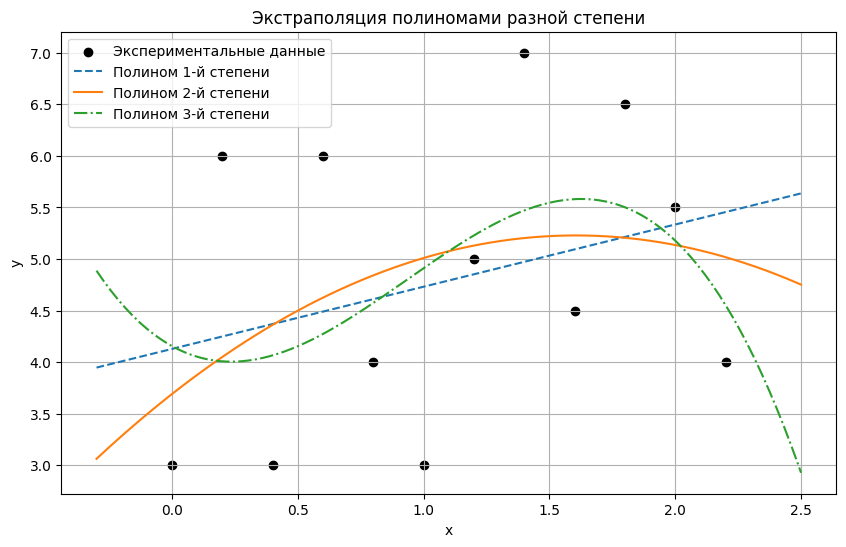

Коэффициенты полинома 1-й степени: [0.60314685 4.12820513]
Коэффициенты полинома 2-й степени: [-0.59627872  1.91496004  3.69093407]
Коэффициенты полинома 3-й степени: [-1.17359492  3.27658453 -1.34763385  4.15567766]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Собственные данные — БОЛЬШЕ ТОЧЕК (12 вместо 6)
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2])
y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0, 5.0, 7.0, 4.5, 6.5, 5.5, 4.0])

# Аппроксимация полиномами первой, второй и третьей степени
p1 = np.poly1d(np.polyfit(x, y, 1))  # линейный
p2 = np.poly1d(np.polyfit(x, y, 2))  # квадратичный
p3 = np.poly1d(np.polyfit(x, y, 3))  # кубический

x_plot = np.linspace(x.min() - 0.3, x.max() + 0.3, 200)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Экспериментальные данные')
plt.plot(x_plot, p1(x_plot), '--', label='Полином 1-й степени')
plt.plot(x_plot, p2(x_plot), '-', label='Полином 2-й степени')
plt.plot(x_plot, p3(x_plot), '-.', label='Полином 3-й степени')
plt.legend()
plt.title('Экстраполяция полиномами разной степени')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Вывод коэффициентов
print("Коэффициенты полинома 1-й степени:", p1.coefficients)
print("Коэффициенты полинома 2-й степени:", p2.coefficients)
print("Коэффициенты полинома 3-й степени:", p3.coefficients)

# 1.1.5 — Задание

Подставьте собственные данные и поэкспериментируйте с представленными функциями:  
    f(x,b)=b0+b1xf(x,b)=b0​+b1​x  
    f(x,b)=b0+b1x+b2x2f(x,b)=b0​+b1​x+b2​x2  
    f(x,b)=b0+b1ln⁡(x)f(x,b)=b0​+b1​ln(x)  
    f(x,b)=b0⋅xb1f(x,b)=b0​⋅xb1​

Проанализируйте динамику изменения данных.

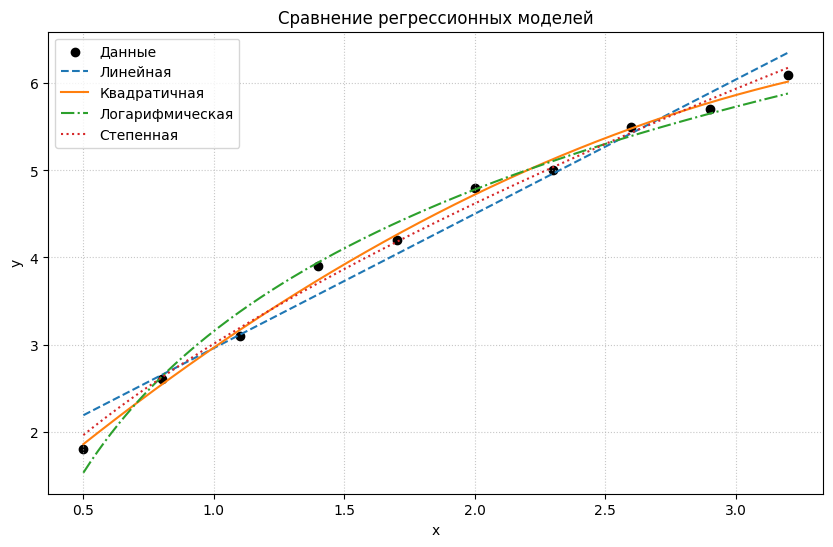

Линейная:       b0 = 1.418, b1 = 1.541
Квадратичная:   b0 = 0.595, b1 = 2.678, b2 = -0.307
Логарифмическая: b0 = 3.155, b1 = 2.345
Степенная:      b0 = 3.010, b1 = 0.618


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array([0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4])
y = np.array([2.5, 3.1, 4.0, 4.6, 5.8, 6.3, 7.4, 8.1, 9.0, 9.6])

def linear(x, b0, b1):
    return b0 + b1 * x

def quadratic(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

def logarithmic(x, b0, b1):
    return b0 + b1 * np.log(x)

def power_law(x, b0, b1):
    return b0 * np.power(x, b1)

p_lin, _ = curve_fit(linear, x, y)
p_quad, _ = curve_fit(quadratic, x, y)
p_log, _ = curve_fit(logarithmic, x, y)
p_pow, _ = curve_fit(power_law, x, y)

x_plot = np.linspace(0.7, 4.6, 300)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', s=60, zorder=5, label='Экспериментальные данные')
plt.plot(x_plot, linear(x_plot, *p_lin), '--', label='Линейная')
plt.plot(x_plot, quadratic(x_plot, *p_quad), '-', label='Квадратичная')
plt.plot(x_plot, logarithmic(x_plot, *p_log), '-.', label='Логарифмическая')
plt.plot(x_plot, power_law(x_plot, *p_pow), ':', label='Степенная')
plt.title('Сравнение моделей регрессии (новые данные)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

print("Параметры моделей:")
print(f"Линейная:       y = {p_lin[0]:.3f} + {p_lin[1]:.3f}·x")
print(f"Квадратичная:   y = {p_quad[0]:.3f} + {p_quad[1]:.3f}·x + {p_quad[2]:.3f}·x²")
print(f"Логарифмическая: y = {p_log[0]:.3f} + {p_log[1]:.3f}·ln(x)")
print(f"Степенная:      y = {p_pow[0]:.3f} · x^{p_pow[1]:.3f}")

# 1.2.1 — Задание

Постройте модель линейной регрессии для произвольных данных из двух столбцов.
Пример данных:
Salary_Data.csv
  

Найдите коэффициенты линии регрессии. Постройте прогноз.

Коэффициент (наклон): 9423.82
Свободный член (сдвиг): 25321.58


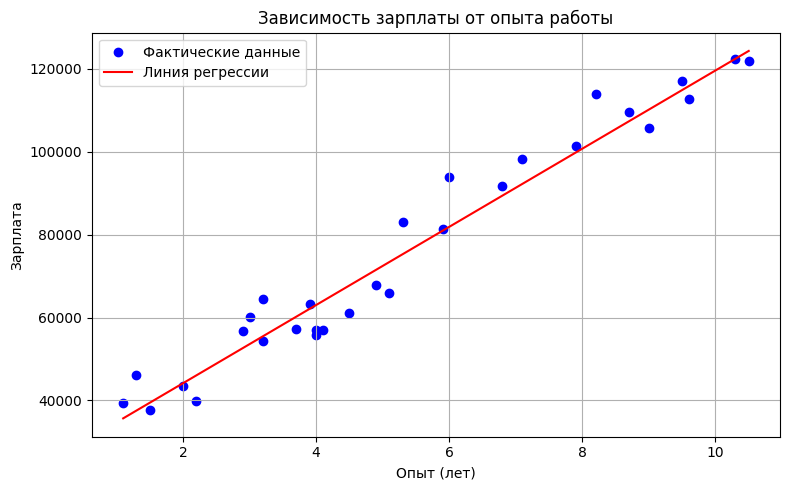


Прогноз зарплаты при опыте 5.5 лет: $77,152.57


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Загрузка данных
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)

X = data[['YearsExperience']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Коэффициент (наклон): {model.coef_[0]:.2f}")
print(f"Свободный член (сдвиг): {model.intercept_:.2f}")


y_pred = model.predict(X_test)




plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Фактические данные')
plt.plot(X, model.predict(X), color='red', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта работы')
plt.xlabel('Опыт (лет)')
plt.ylabel('Зарплата')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



new_experience = np.array([[5.5]])
predicted_salary = model.predict(new_experience)
print(f"\nПрогноз зарплаты при опыте 5.5 лет: ${predicted_salary[0]:,.2f}")

# 1.3.2 — Задание

Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов.  

Варианты данных:  

    Потребление газа в 48 штатах США:
    petrol_consumption.csv
      
    Качество красного вина:
    winequality-red.csv

Найдите коэффициенты множественной регрессии. Постройте прогноз.

# Задание* (экспериментальное)

Экспериментально получены NN значений величины YY при различных значениях величины XX.
Постройте полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов.
Результаты выведите в виде таблиц значений и графиков полученных полиномов.


Вариант 3: x=[3.0,3.2,3.4,3.6,3.8,4.0], y=[2.0,3.0,3.0,3.0,2.0,4.0]
